<a href="https://colab.research.google.com/github/Miranda-Merino-Irigoyen-Jorge-Missael/Simulaci-n-2/blob/main/Articulo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                            OLS Regression Results                            
Dep. Variable:              Seguridad   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     117.0
Date:                Sun, 05 Jan 2025   Prob (F-statistic):           4.84e-11
Time:                        23:02:39   Log-Likelihood:                -51.122
No. Observations:                  21   AIC:                             108.2
Df Residuals:                      18   BIC:                             111.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -22.0848     10.215     -2.162

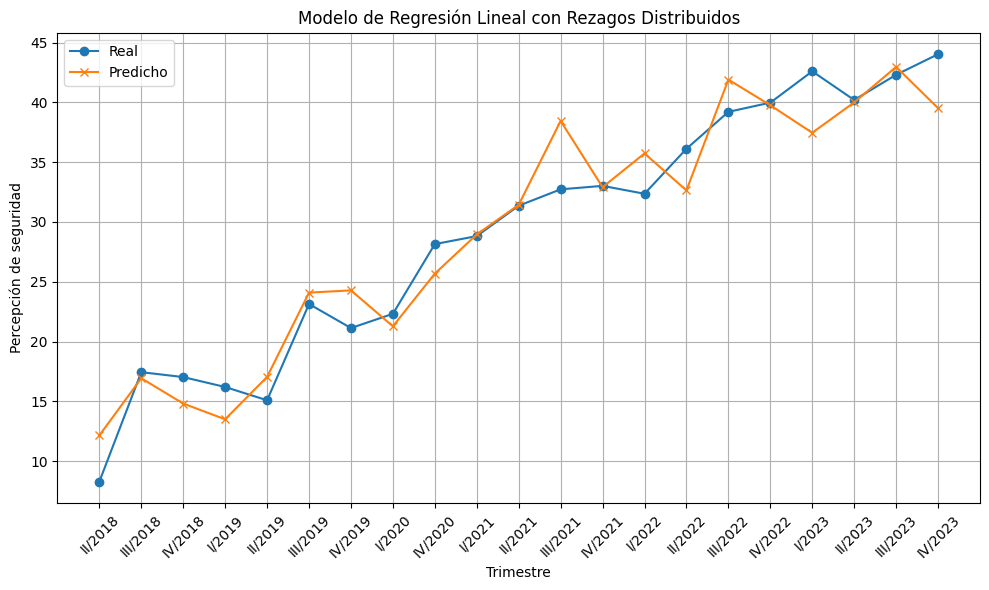

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Crear los datos manualmente
trimestre = ['I/2018', 'II/2018', 'III/2018', 'IV/2018', 'I/2019', 'II/2019', 'III/2019', 'IV/2019',
             'I/2020', 'II/2020', 'III/2020', 'IV/2020', 'I/2021', 'II/2021', 'III/2021', 'IV/2021',
             'I/2022', 'II/2022', 'III/2022', 'IV/2022', 'I/2023', 'II/2023', 'III/2023', 'IV/2023']

seguridad = [7.37, 8.28, 17.44, 17.03, 16.20, 15.09, 23.14, 21.13, 22.32, np.nan, 25.64, 28.15,
             28.82, 31.36, 32.73, 33.02, 32.36, 36.12, 39.21, 39.98, 42.60, 40.20, 42.31, 44.03]

robo = [5086, 5722, 6388, 6588, 4807, 3724, 3323, 3053, 2855, np.nan, 2169, 2371,
        2383, 2134, 2289, 2322, 2261, 2095, 2123, 2143, 1971, 1620, 1548, 1719]

violencia_familiar = [4750, 5424, 4996, 4759, 5567, 6837, 6922, 6481, 7350, 5316, 7303, 7797,
                      8189, 9340, 8437, 8881, 8398, 9895, 9550, 9181, 9609, 10129, 9590, 8249]

# Crear el DataFrame
data = pd.DataFrame({'Trimestre': trimestre, 'Seguridad': seguridad, 'Robo': robo, 'Violencia_Familiar': violencia_familiar})

# Crear rezagos (lag 1)
data['Robo_Lag'] = data['Robo'].shift(1)
data['Violencia_Lag'] = data['Violencia_Familiar'].shift(1)

# Eliminar las primeras filas con valores nulos generados por el rezago y valores faltantes
data = data.dropna()

# Variables predictoras (X) y dependiente (Y)
X = data[['Robo_Lag', 'Violencia_Lag']]
Y = data['Seguridad']

# Agregar constante para la regresión en statsmodels
X = sm.add_constant(X)

# Modelo de regresión lineal usando statsmodels para obtener significancia
model = sm.OLS(Y, X).fit()

# Resultados del modelo
print(model.summary())

# Predicciones
Y_pred = model.predict(X)

# Evaluación del modelo
print('Error cuadrático medio (MSE):', mean_squared_error(Y, Y_pred))
print('R²:', r2_score(Y, Y_pred))

# Visualización
plt.figure(figsize=(10, 6))
plt.plot(data['Trimestre'], Y, label='Real', marker='o')
plt.plot(data['Trimestre'], Y_pred, label='Predicho', marker='x')
plt.xticks(rotation=45)
plt.xlabel('Trimestre')
plt.ylabel('Percepción de seguridad')
plt.title('Modelo de Regresión Lineal con Rezagos Distribuidos')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
